In [73]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Conv2D

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from sklearn.metrics import cohen_kappa_score

In [74]:
# Load the augmented data from the saved file
data = np.load('../data/external/coral_augmented_combined_vgg16.npz')

# Access the arrays from the loaded data
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']

# Check the shape of the loaded data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5104, 224, 224, 3)
y_train shape: (5104,)
X_test shape: (1276, 224, 224, 3)
y_test shape: (1276,)


In [75]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels in both training and test sets
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert the encoded labels to one-hot encoded format
num_classes = len(label_encoder.classes_)
y_train_onehot = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes=num_classes)

In [24]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add your own fully connected layers for classification
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)  # Add your desired number of neurons
output = Dense(num_classes, activation='softmax')(x)  # num_classes is the number of classes in your data

# Create a new model with your layers on top of the VGG16 base
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# You can choose a different optimizer and loss function depending on your specific problem.

# Now, you can train your model using your augmented and normalized data
model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=5, batch_size=32)  # You can adjust the number of epochs and batch size



Epoch 1/5
160/160 [==============================] - 828s 5s/step - loss: 0.9957 - accuracy: 0.9741 - val_loss: 0.3650 - val_accuracy: 0.9835
Epoch 2/5
160/160 [==============================] - 822s 5s/step - loss: 0.1746 - accuracy: 0.9910 - val_loss: 0.1614 - val_accuracy: 0.9914
Epoch 3/5
160/160 [==============================] - 822s 5s/step - loss: 0.2051 - accuracy: 0.9955 - val_loss: 0.6434 - val_accuracy: 0.9812
Epoch 4/5
160/160 [==============================] - 822s 5s/step - loss: 0.1042 - accuracy: 0.9971 - val_loss: 0.3129 - val_accuracy: 0.9898
Epoch 5/5
160/160 [==============================] - 822s 5s/step - loss: 0.0094 - accuracy: 0.9996 - val_loss: 0.0812 - val_accuracy: 0.9961


In [25]:
model.save('../models/coral_vgg16_freezed.h5')

In [22]:
model.save('../models/coral_vgg16_3.h5')

In [23]:
print("Accuracy of the model is - " , model.evaluate(X_test,y_test_onehot)[1]*100 , "%")

40/40 [==============================] - 165s 4s/step - loss: 0.6928 - accuracy: 0.5110
Accuracy of the model is -  51.09717845916748 %


In [76]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add your own fully connected layers for classification
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)  # Add your desired number of neurons
output = Dense(num_classes, activation='softmax')(x)  # num_classes is the number of classes in your data

# Create a new model with your layers on top of the VGG16 base
model = Model(inputs=base_model.input, outputs=output)

# You can choose a different optimizer and loss function depending on your specific problem.
# Optionally, you can unfreeze some layers in the base_model and fine-tune the network.
# For example, you can unfreeze the last few convolutional layers and recompile the model.
for layer in base_model.layers[-2:]:
    layer.trainable = True

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train for a few more epochs to fine-tune the model
history = model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=10, batch_size=32)

Epoch 1/10
160/160 [==============================] - 868s 5s/step - loss: 2.4780 - accuracy: 0.9592 - val_loss: 0.0897 - val_accuracy: 0.9851
Epoch 2/10
160/160 [==============================] - 870s 5s/step - loss: 0.0975 - accuracy: 0.9886 - val_loss: 0.0452 - val_accuracy: 0.9882
Epoch 3/10
160/160 [==============================] - 875s 5s/step - loss: 9.0706e-04 - accuracy: 1.0000 - val_loss: 0.0513 - val_accuracy: 0.9914
Epoch 4/10
160/160 [==============================] - 875s 5s/step - loss: 0.0305 - accuracy: 0.9953 - val_loss: 0.1059 - val_accuracy: 0.9875
Epoch 5/10
160/160 [==============================] - 855s 5s/step - loss: 0.0043 - accuracy: 0.9998 - val_loss: 0.0369 - val_accuracy: 0.9937
Epoch 6/10
160/160 [==============================] - 1191s 7s/step - loss: 0.1893 - accuracy: 0.9943 - val_loss: 1.9070 - val_accuracy: 0.9757
Epoch 7/10
160/160 [==============================] - 846s 5s/step - loss: 0.2089 - accuracy: 0.9943 - val_loss: 0.9341 - val_accuracy: 0

In [77]:
model.save('../models/coral_vgg16_unfreezed2.h5')

In [39]:
# Load the saved model
model = load_model('../models/coral_vgg16_unfreezed2.h5')

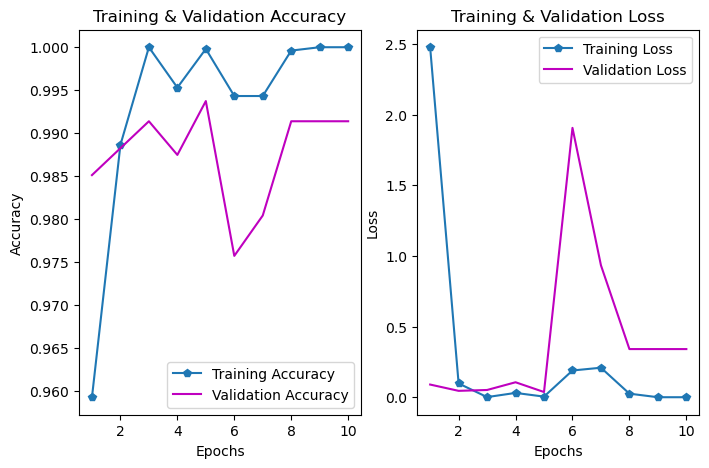

In [89]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have the `history` object
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(8, 5)

# Extract training and validation accuracy from the history object
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation accuracy with purple markers and solid line
ax[0].plot(epochs, train_acc, 'p-', label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'm-', label='Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

# Extract training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss with purple markers and solid line
ax[1].plot(epochs, train_loss, 'p-', label='Training Loss')
ax[1].plot(epochs, val_loss, 'm-', label='Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()


In [79]:
# Evaluate the model on the test data
accuracy = model.evaluate(X_test, y_test_onehot)[1]  # Index 1 corresponds to accuracy
print("Accuracy of the model is:", accuracy * 100, "%")

# You can also calculate other evaluation metrics, such as precision, recall, and F1-score.
from sklearn.metrics import classification_report

# Get model predictions
y_pred = model.predict(X_test)

# Convert one-hot encoded labels back to class labels
y_test_class = label_encoder.inverse_transform(np.argmax(y_test_onehot, axis=1))
y_pred_class = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))

# Generate a classification report
report = classification_report(y_test_class, y_pred_class)

print("Classification Report:")
print(report)


40/40 [==============================] - 170s 4s/step - loss: 0.3408 - accuracy: 0.9914
Accuracy of the model is: 99.13793206214905 %
40/40 [==============================] - 165s 4s/step
Classification Report:
                precision    recall  f1-score   support

          APAL       0.98      1.00      0.99       652
Pseudodiploria       1.00      0.98      0.99       624

      accuracy                           0.99      1276
     macro avg       0.99      0.99      0.99      1276
  weighted avg       0.99      0.99      0.99      1276



In [80]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa = cohen_kappa_score(y_test_class, y_pred_class)

print("Cohen's Kappa:", cohen_kappa)


Cohen's Kappa: 0.9827437827949269


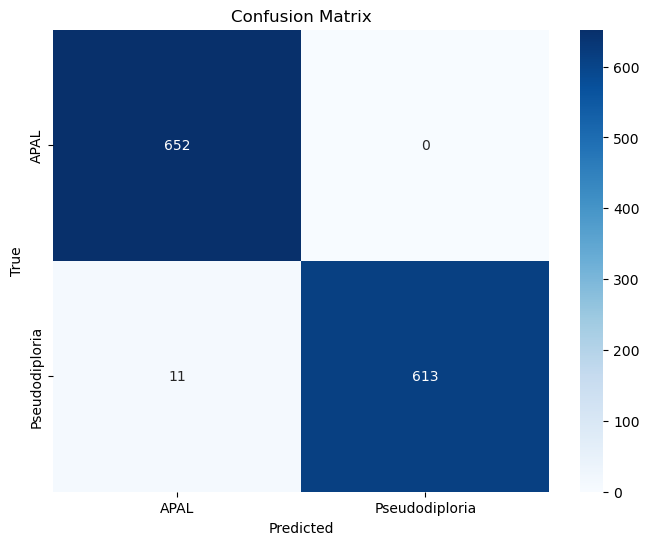

In [81]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


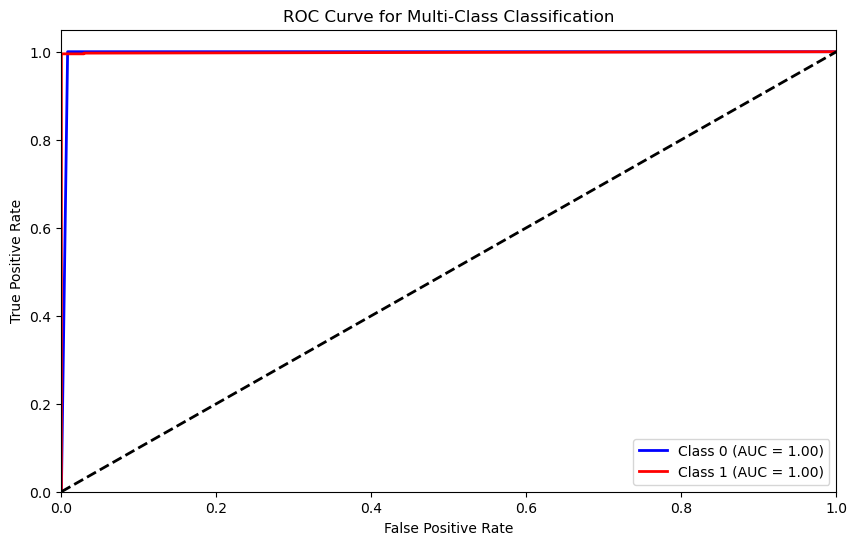

In [82]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have `y_test_encoded` and `y_pred` from your code
n_classes = 2  # Number of classes

fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate the ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='best')
plt.show()


In [83]:
# Access the training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']


In [90]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add your own fully connected layers for classification
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)  # Add your desired number of neurons
output = Dense(num_classes, activation='softmax')(x)  # num_classes is the number of classes in your data

# Create a new model with your layers on top of the VGG16 base
model = Model(inputs=base_model.input, outputs=output)

# You can choose a different optimizer and loss function depending on your specific problem.
# Optionally, you can unfreeze some layers in the base_model and fine-tune the network.
# For example, you can unfreeze the last few convolutional layers and recompile the model.
for layer in base_model.layers[-1:]:
    layer.trainable = True

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train for a few more epochs to fine-tune the model
history = model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=10, batch_size=32)

Epoch 1/10
160/160 [==============================] - 839s 5s/step - loss: 1.2847 - accuracy: 0.9743 - val_loss: 0.5682 - val_accuracy: 0.9749
Epoch 2/10
160/160 [==============================] - 824s 5s/step - loss: 0.1384 - accuracy: 0.9916 - val_loss: 0.7864 - val_accuracy: 0.9765
Epoch 3/10
160/160 [==============================] - 821s 5s/step - loss: 0.2108 - accuracy: 0.9939 - val_loss: 0.8790 - val_accuracy: 0.9773
Epoch 4/10
160/160 [==============================] - 849s 5s/step - loss: 0.0428 - accuracy: 0.9973 - val_loss: 0.7043 - val_accuracy: 0.9843
Epoch 5/10
160/160 [==============================] - 836s 5s/step - loss: 0.0209 - accuracy: 0.9988 - val_loss: 0.1937 - val_accuracy: 0.9914
Epoch 6/10
160/160 [==============================] - 840s 5s/step - loss: 0.0103 - accuracy: 0.9988 - val_loss: 0.3918 - val_accuracy: 0.9890
Epoch 7/10
160/160 [==============================] - 824s 5s/step - loss: 0.0465 - accuracy: 0.9984 - val_loss: 0.5162 - val_accuracy: 0.9851

In [91]:
model.save('../models/coral_vgg16_unfreezed1.h5')

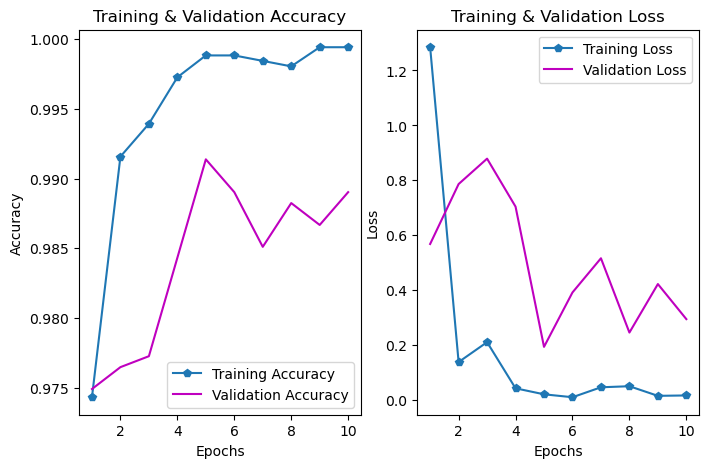

In [92]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have the `history` object
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(8, 5)

# Extract training and validation accuracy from the history object
epochs = range(1, len(history.history['accuracy']) + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation accuracy with purple markers and solid line
ax[0].plot(epochs, train_acc, 'p-', label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'm-', label='Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

# Extract training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss with purple markers and solid line
ax[1].plot(epochs, train_loss, 'p-', label='Training Loss')
ax[1].plot(epochs, val_loss, 'm-', label='Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()


In [93]:
# Evaluate the model on the test data
accuracy = model.evaluate(X_test, y_test_onehot)[1]  # Index 1 corresponds to accuracy
print("Accuracy of the model is:", accuracy * 100, "%")

# You can also calculate other evaluation metrics, such as precision, recall, and F1-score.
from sklearn.metrics import classification_report

# Get model predictions
y_pred = model.predict(X_test)

# Convert one-hot encoded labels back to class labels
y_test_class = label_encoder.inverse_transform(np.argmax(y_test_onehot, axis=1))
y_pred_class = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))

cohen_kappa = cohen_kappa_score(y_test_class, y_pred_class)

# Generate a classification report
report = classification_report(y_test_class, y_pred_class)

print("Cohen's Kappa:", cohen_kappa)
print("Classification Report:")
print(report)


40/40 [==============================] - 167s 4s/step - loss: 0.2946 - accuracy: 0.9890
Accuracy of the model is: 98.90282154083252 %
40/40 [==============================] - 163s 4s/step
Cohen's Kappa: 0.9780382977467864
Classification Report:
                precision    recall  f1-score   support

          APAL       0.98      1.00      0.99       652
Pseudodiploria       1.00      0.98      0.99       624

      accuracy                           0.99      1276
     macro avg       0.99      0.99      0.99      1276
  weighted avg       0.99      0.99      0.99      1276



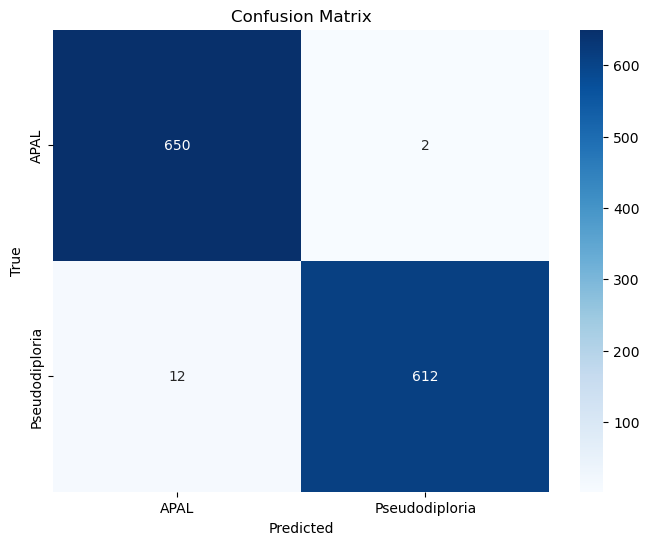

In [94]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


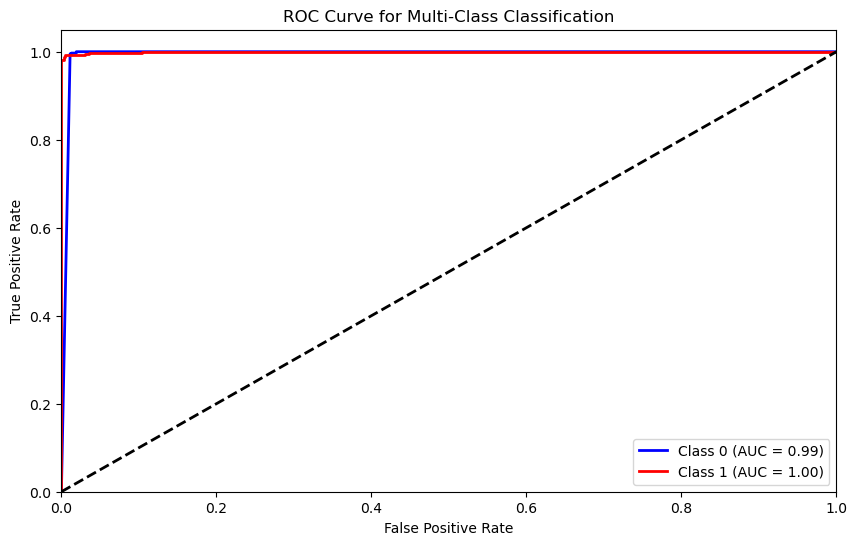

In [95]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have `y_test_encoded` and `y_pred` from your code
n_classes = 2  # Number of classes

fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate the ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='best')
plt.show()
